In [1]:
import numpy as np
from PIL import Image
import cv2
import torch


/Users/zoewefers/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
img = np.array(Image.open("fake_8632.png"))
print(np.sum(img[:, :, 2]))
img[:, :, 2] = 0
print(np.sum(img[:, :, 2]))
Image.fromarray(img, "RGB").save("fake_8632.png")

8323072
0


In [ ]:
mses_cols = ["MSE chan " + str(i) for i in range(mses.shape[1])]
mae_cols = ["MAE chan " + str(i) for i in range(mses.shape[1])]
ssim_cols = ["SSIM chan " + str(i) for i in range(mses.shape[1])]
iou_cols = ["IOUs chan " + str(i) for i in range(mses.shape[1])]
pcc_cols = ["PCC chan " + str(i) for i in range(mses.shape[1])]
edists_cols = ["Euclidean chan " + str(i) for i in range(mses.shape[1])]
cdists_cols = ["Cosine chan " + str(i) for i in range(mses.shape[1])]
cols = mses_cols + mae_cols + ssim_cols + iou_cols + pcc_cols + edists_cols + cdists_cols + cdists

In [11]:
t = torch.tensor([[1,2]])
a = torch.tensor([[1,1]])
b = torch.ones_like(t)*3

torch.cat([t,a,b]).size()

torch.Size([3, 2])

In [27]:
t = torch.tensor([[[[1,2,3], [1,2,3], [1,2,3]],[[4,5,6], [4,5,6], [4,5,6]]]])
t = t.repeat(16, 1, 1, 1).to(torch.float)
m = t.mean(dim=[2,3])
print(t.shape)
print(m.shape)
m = m[:, :, None, None]
print(m.shape)
diff = t-m
print(torch.sum(diff, dim=[2,3]))

torch.Size([16, 2, 3, 3])
torch.Size([16, 2])
torch.Size([16, 2, 1, 1])
tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])


In [3]:

cell_paint = []
cell_paint.append(np.array(Image.open("r07c18f08p01-ch1sk1fk1fl1_2.png")))
cell_paint.append(np.array(Image.open("r07c18f08p01-ch2sk1fk1fl1_2.png")))
cell_paint.append(np.array(Image.open("r07c18f08p01-ch3sk1fk1fl1_2.png")))
cell_paint.append(np.array(Image.open("r07c18f08p01-ch4sk1fk1fl1_2.png")))
cell_paint.append(np.array(Image.open("r07c18f08p01-ch5sk1fk1fl1_2.png")))

im = np.array(cell_paint)
print(im.shape)

(5, 250, 250)


In [4]:
masks = cv2.resize(cell_paint, dsize=(256, 256), interpolation=cv2.INTER_NEAREST)
print(masks.shape)

error: OpenCV(4.9.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


In [33]:
single_cell_mask = np.array(labels == 1).astype(np.uint8)
print(single_cell_mask.shape)
single_cell_mask = np.expand_dims(single_cell_mask,0)
print(single_cell_mask.shape)
single_cell_mask = np.repeat(single_cell_mask, 5, axis=0)
print(single_cell_mask.shape)
assert single_cell_mask.shape == (5, 250, 250)

#single_cell_mask = single_cell_mask.transpose((1,2,0))
#single_cell_mask = cv2.resize(single_cell_mask, dsize=(256, 256), interpolation=cv2.INTER_NEAREST) #resize
#single_cell_mask = single_cell_mask.transpose((2,0,1))
#assert single_cell_mask.shape == (5, 256, 256)

(250, 250)
(1, 250, 250)
(5, 250, 250)


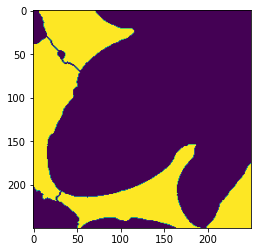

In [3]:
plt.imshow(mask)
plt.show()

In [53]:
original_sc_masked = im * single_cell_mask
print(original_sc_masked[0].shape)
original_dino_list = list(np.concatenate([original_sc_masked, single_cell_mask[0:1, :, :]]))
print(len(original_dino_list))


(250, 250)
6


In [51]:
original_dino_format = np.concatenate(original_dino_list, axis=1)
print(original_dino_format.shape)

(250, 1500)


In [65]:
ref = np.array(Image.open("ref_13.png"))[:, :, :-1]
ref = np.swapaxes(ref, 0, 2)
print(ref.shape)

recon = np.array(Image.open("fake_13.png"))
recon = np.swapaxes(recon, 0, 2)
print(recon.shape)

real = np.array(Image.open("real_13.png"))
real = np.swapaxes(real, 0, 2)
print(real.shape)

img = np.concatenate([ref, recon], axis = 0)
print(img.shape)



(2, 256, 256)
(3, 256, 256)
(3, 256, 256)
(5, 256, 256)


In [63]:
plt.clf()
ref = microshow(ref, cmaps=['pure_yellow', 'pure_blue'])
ref.savefig("test_ref.png")

In [64]:
plt.clf()
recon = microshow(recon, cmaps=['pure_red', 'pure_green', 'pure_blue'])
recon.savefig("test_recon.png")

In [35]:
# channels: 4, 5, 1, 2, 3, --> ER, DAPI, Mito, AGP, Nucleoli --> Yellow, blue, red, orange, green, 

microim = microshow(img, cmaps=['pure_yellow', 'pure_blue', 'pure_red', 'pure_magenta', 'pure_green'])

microim.savefig("test_img.png")

In [10]:
rand_im = [np.random.randint(0,255, (10,10)) for x in range(5)]

mi = microshow(rand_im,cmaps=['pure_red', 'pure_green', 'pure_magenta', 'pure_cyan', 'pure_yellow'])